2차 다항식 계수
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]
3차 다항식 계수
[[ 1.  1.  2.  1.  2.  4.  1.  2.  4.  8.]
 [ 1.  3.  4.  9. 12. 16. 27. 36. 48. 64.]]
Polynomial 절편
1.76
Polynomial 회귀 계수
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]

Degree=1 회귀 계수는 [-1.61] 입니다.
Degree=1 MSE 는 0.41 입니다.

Degree=4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree=4 MSE 는 0.04 입니다.

Degree=15 회귀 계수는 [-2.98291000e+03  1.03898880e+05 -1.87415324e+06  2.03715471e+07
 -1.44872830e+08  7.09313489e+08 -2.47065245e+09  6.24559902e+09
 -1.15676336e+10  1.56894743e+10 -1.54005873e+10  1.06457184e+10
 -4.91377255e+09  1.35919593e+09 -1.70380747e+08] 입니다.
Degree=15 MSE 는 181238260.15 입니다.


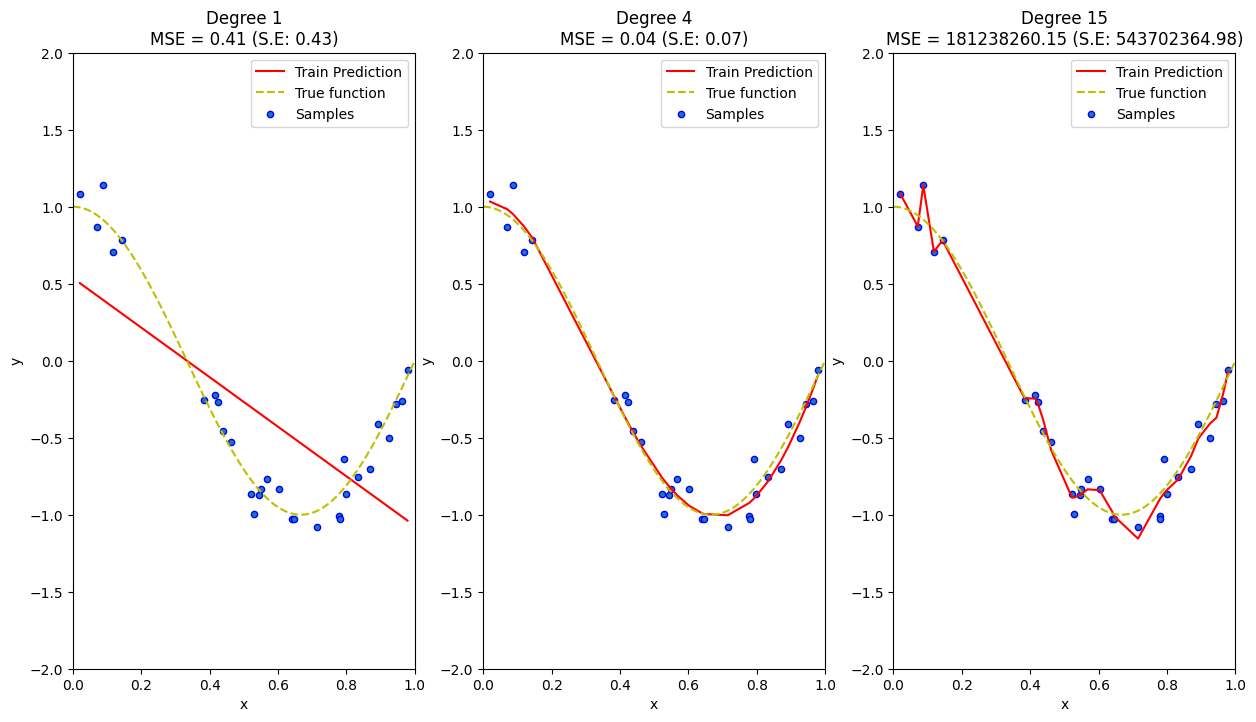

In [8]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
x = np.array([1,2,3,4]).reshape(2,2)

# 2차 다항식 계수
poly2 = PolynomialFeatures(degree=2)
poly2.fit(x)
poly_ftr_2 = poly2.transform(x)

# 3차 다항식 계수
poly3 = PolynomialFeatures(degree=3)
poly_ftr_3 = poly3.fit_transform(x)

print(f"2차 다항식 계수")
print(poly_ftr_2)
print(f"3차 다항식 계수")
print(poly_ftr_3)

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
# y = 1 + 2X_1 + 3X_1^2 + 4X_2^3 데이터 생성
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(-2,2)
y = polynomial_func(X)

# Pipeline으로 Polynomial변환, Linear Regression 연결
model = Pipeline( [('poly', PolynomialFeatures(3)),
                   ('linear', LinearRegression())] )

model = model.fit(X, y)
print('Polynomial 절편')
print(np.round(model.named_steps.linear.intercept_, 2))
print('Polynomial 회귀 계수')
print(np.round(model.named_steps.linear.coef_, 2))

# X: 0 ~ 1값의 30개 랜덤샘플
np.random.seed(0)
n = 30
X = np.sort(np.random.rand(n))

# cosine 값 함수
def make_y(X):
    y = np.cos(1.5 * np.pi * X)
    return y

# y: cosine 값 + Noise
noise = np.random.randn(n)*0.1
y = make_y(X) + noise

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

fig, axs = plt.subplots(1,3, figsize=(15,8))

degrees = [1, 4, 15]

# 다항 회귀 차수별 비교
for i, degree in enumerate(degrees):
    # plt.setp(axs[i], xticks=(), yticks=())
    
    # degree별 다항식 학습
    poly_features = PolynomialFeatures(degree = degree, include_bias=False)
    lr = LinearRegression()
    
    model = Pipeline([("polynomial_features", poly_features),
                         ("linear_regression", lr)])
    model.fit(X.reshape(-1, 1), y)
    
    # 교차 검증
    mse_scores = cross_val_score(model, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = model.named_steps['linear_regression'].coef_
    mse = -np.mean(mse_scores)
    
    print(f'\nDegree={degree} 회귀 계수는 {np.round(coefficients,2)} 입니다.')
    print(f'Degree={degree} MSE 는 {mse:.2f} 입니다.')
    
    # 적합된 회귀식으로 test 데이터에 대해 예측 곡선, 실제 곡선 비교
    X_test = np.linspace(0, 1, 100).reshape(-1,1)
    y_test = make_y(X_test)
    y_pred = model.predict(X_test)
    
    # 학습 예측값
    axs[i].plot(X, model.predict(X.reshape(-1,1)), "r", label = "Train Prediction")
    
    # test 예측값
    # axs[i].plot(X_test, y_pred, "r", label = "Test Prediction")
    
    # 실제값
    axs[i].plot(X_test, y_test, 'y--', label = "True function") # Noise: X
    axs[i].scatter(X, y, edgecolor='b', s=20, label = "Samples") # Noise: O
    
    # 기타 설정
    axs[i].set_xlabel("x"); axs[i].set_ylabel("y")
    axs[i].set_xlim((0, 1)); axs[i].set_ylim((-2, 2))
    axs[i].legend(loc="best")
    axs[i].set_title(f"Degree {degree}\nMSE = {mse:.2f} (S.E: {mse_scores.std():.2f})")

plt.show()